In [ ]:
import tensorflow as tf
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from keras.callbacks import TensorBoard

from tensorflow import keras
from keras.models import Sequential
from keras.layers import *
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import os
import numpy as np


from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model 

import skimage
from skimage.transform import resize
from  skimage import transform

import pickle
import time

tf.compat.v1.disable_eager_execution()

batch_size = 32
num_classes = 10
epochs = 50
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


NAME = "CIFAR-10-{}".format(int(time.time()))

#model = load_model("first_model.h5")

model = Sequential()

model.add(VGG16(include_top=False, weights='imagenet', input_shape = (32, 32, 3)))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('sigmoid'))

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'],
              )



#new_shape = (224, 224, 3)
#x_train = np.asarray([transform.resize(x_train, new_shape) for x_train in x_train])

#new_shape = (224,224,3)
#x_train = [skimage.transform.resize(x_train, new_shape) for x_train in x_train]


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


datagen = ImageDataGenerator(validation_split=0.2)

datagen.fit(x_train)



model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                    steps_per_epoch=len(x_train) / batch_size,
                    validation_data=(x_train, y_train),
                    epochs=epochs,
                    callbacks=[tensorboard])
                    


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [2]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 1, 256)         1179904   
_________________________________________________________________
activation_1 (Activation)    (None, 1, 1, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 256)         590080    
_________________________________________________________________
activation_2 (Activation)    (None, 1, 1, 256)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)              

In [27]:
from keras.models import load_model 
model.save("second_model.h5")
model.save_weights("second_model_weights.h5")

In [28]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 3s 251us/step
Test loss: 0.902205610968126
Test accuracy: 0.8776000142097473


In [29]:
pred=model.predict(x_test, verbose=1)

10000/10000 [==============================] - 3s 256us/step


Using TensorFlow backend.
/home/trojan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/trojan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/trojan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/trojan/.local/lib/python3.6/site-packages/tensorflow/python

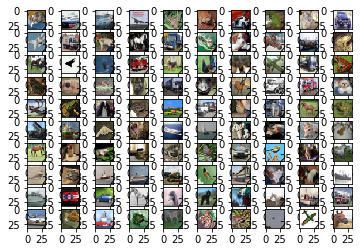

In [2]:
from matplotlib import pyplot
from keras.datasets import cifar10
def show_imgs(X):
    pyplot.figure(1)
    k = 0
    for i in range(0,5):
        for j in range(0,5):
            pyplot.subplot2grid((5,5),(i,j))
            pyplot.imshow((X[k]))
            k = k+1
    # show the plot
    pyplot.show()
 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
show_imgs(x_test[:25])

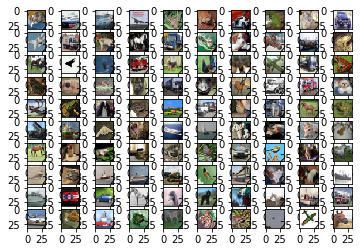

NameError: name 'model' is not defined

In [3]:
import numpy as np

show_imgs(x_test[:25])
labels =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
 
indices = np.argmax(model.predict(x_test[:25]),1)
print ([labels[x] for x in indices])

In [33]:

import pandas as pd
# Get classes by np.round
#cl = np.round(pred)
# Get filenames (set shuffle=false in generator is important)
#filenames=test_generator.filenames






In [1]:
# Data frame
sorted_ids = list(range(1, len(x_test) + 1))
sorted_ids.sort(key=lambda x: str(x))
results=pd.DataFrame({'id': sorted_ids, "pr":pred[:,0], "class": labels [9]})

results.to_csv("results8.csv",index=False)

NameError: name 'x_test' is not defined